# Detecting faces in images

Histograms of Oriented Gradients for Human Detection is a useful way of detecting faces in images (http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)


The dlib module has an implementation of the algorithm: http://dlib.net/python/index.html#dlib.face_recognition_model_v1

In [1]:
%matplotlib inline

import sys
import dlib


import matplotlib.pyplot as plt
import matplotlib.patches as patches

from skimage import io

In [2]:
face_detector = dlib.get_frontal_face_detector()

In [3]:
def coord_finder(d):
    width = d.right() - d.left()
    height = d.top() - d.bottom()
    lower_x_y = (d.right() - width, d.bottom())
    
    return (width, height, lower_x_y)

In [4]:
def face_painter(image_path, detector):
    im = io.imread(image_path)
    f = detector(im, 1)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(12, 9)
    ax.imshow(im)

    for box in f:
        width, height, lower_x_y = coord_finder(box)
        rect = patches.Rectangle(lower_x_y,width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);

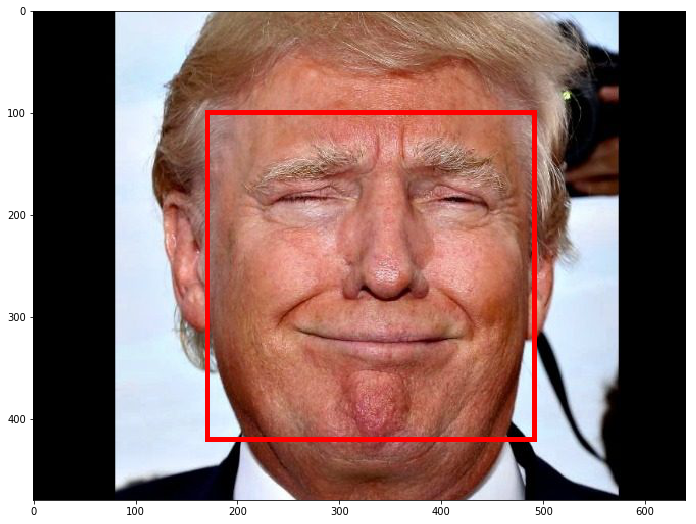

In [5]:
face_painter(r"D:\Pictures\TheDonald.jpg", face_detector)

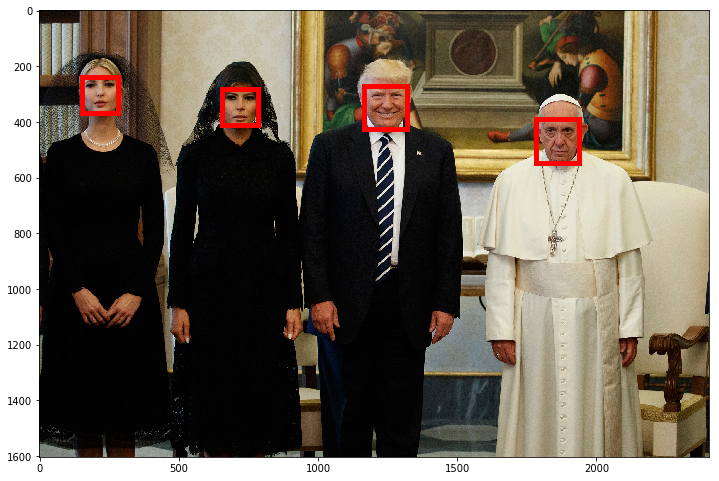

In [6]:
face_painter("D:\Pictures\TheDonald2.jpg", face_detector)

In [7]:
face_pose_predictor = dlib.shape_predictor(r"D:\Models\shape_predictor_68_face_landmarks.dat")

In [8]:
def face_painter(image_path, detector, pose_predictor):
    im = io.imread(image_path)
    f = detector(im, 1)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(12, 9)
    ax.imshow(im)

    
    
    for box in f:
        width, height, lower_x_y = coord_finder(box)
        rect = patches.Rectangle(lower_x_y,width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);
        
        pose_landmarks = pose_predictor(im, box)
        
        for i in range(len(pose_landmarks.parts())):
            ax.plot(pose_landmarks.part(i).x, pose_landmarks.part(i).y, marker='o', markersize=3, color="blue")
        

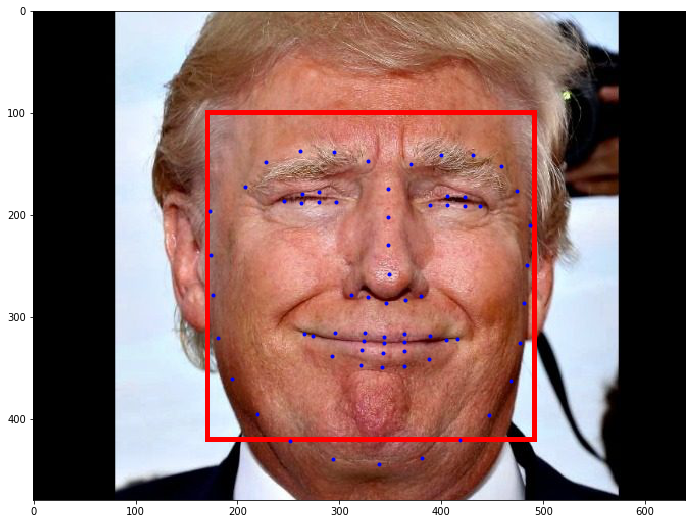

In [9]:
face_painter(r"D:\Pictures\TheDonald.jpg", face_detector, face_pose_predictor)

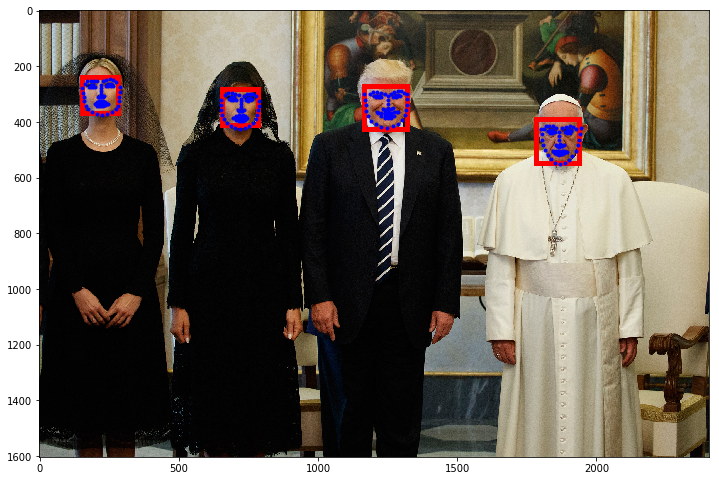

In [10]:
face_painter("D:\Pictures\TheDonald2.jpg", face_detector, face_pose_predictor)

# Comparison

Dlib also has an implementation of FaceNet (https://www.cv-foundation.org/openaccess/content_cvpr_2015/app/1A_089.pdf) using a ResNet model. FaceNet generates 128 dimensional embeddings of faces. If the l2 norm of any pair of embeddings is below 0.6, they are predicted to be the same face.

In [13]:
facerec = dlib.face_recognition_model_v1(r"D:\Models\dlib_face_recognition_resnet_model_v1.dat\dlib_face_recognition_resnet_model_v1.dat")

In [ ]:
img = io.imread(r"D:\Pictures\TheDonald.jpg")

In [33]:
def FaceNet(img):

    dets = face_detector(img, 1)

    maxi = 0 
    index = 0 
    for i, box in enumerate(dets): 
        size = coord_finder(box)[0] ** 2
        if size > maxi: 
            index = i #Find the largest bounding box (closest person)

        # Get the landmarks/parts for the face in box d.
        shape = face_pose_predictor(img, dets[index])

        face_descriptor = facerec.compute_face_descriptor(img, shape)
        return np.array(face_descriptor)

In [34]:
FaceNet(img)

array([-0.12234743,  0.1610769 ,  0.07849883,  0.01098561, -0.08687798,
        0.0537131 ,  0.03879688, -0.08439223,  0.10677577, -0.11742625,
        0.23496358, -0.05803916, -0.2838926 , -0.05205391, -0.02663594,
        0.13865601, -0.14859086, -0.12018728, -0.20593314, -0.10335993,
        0.03950475,  0.12602897, -0.07061081, -0.0327905 , -0.17263858,
       -0.2863301 , -0.03034746, -0.11325818,  0.0164496 , -0.09257936,
        0.0401594 ,  0.07122405, -0.2088428 , -0.03204815, -0.01913631,
        0.0295898 , -0.12617567,  0.00048699,  0.1891392 ,  0.0613001 ,
       -0.16433123,  0.02082204,  0.0612261 ,  0.25493985,  0.14954115,
       -0.00922732,  0.01877365, -0.07408725,  0.09234313, -0.28332233,
       -0.00737944,  0.20691617,  0.12109336,  0.20693877,  0.0665406 ,
       -0.13956775, -0.00347289,  0.08299121, -0.12508862,  0.11142715,
        0.08256286, -0.23173986, -0.02802442, -0.04745337,  0.10817638,
        0.02249982, -0.04837894, -0.09719895,  0.21004125, -0.15

In [63]:
def comparison(img1, img2): 
    if np.linalg.norm(FaceNet(img1)-FaceNet(img2)) < 0.6:
        return("This is the same person")
    else:
        return("This is not the same person")

In [49]:
don1 = io.imread(r"D:\Pictures\TheDonald.jpg")
don2 = io.imread(r"D:\Pictures\TheDonald3.jpg")

This is the same person


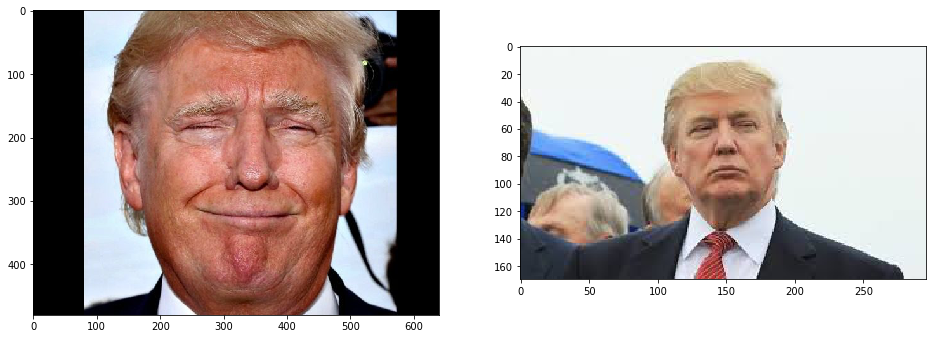

In [64]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 12)
axes[0].imshow(don1)
axes[1].imshow(don2);
print(comparison(don1, don2))

In [59]:
np.linalg.norm(FaceNet(don1)-FaceNet(don2))

0.50008813813869968

In [60]:
Hillary = io.imread(r"D:\Pictures\Hillary.jpg")

This is not the same person


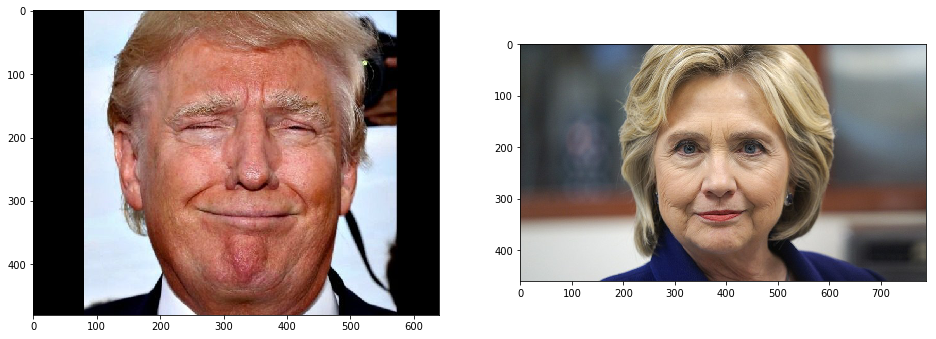

In [65]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 12)
axes[0].imshow(don1)
axes[1].imshow(Hillary);
print(comparison(don1, Hillary))

In [62]:
np.linalg.norm(FaceNet(don1)-FaceNet(Hillary))

0.68744888519002934

In [66]:
Katy = io.imread(r"D:\Pictures\KatyPerry1.jpg")
Zoey = io.imread(r"D:\Pictures\Zoey1.jpg")

This is not the same person


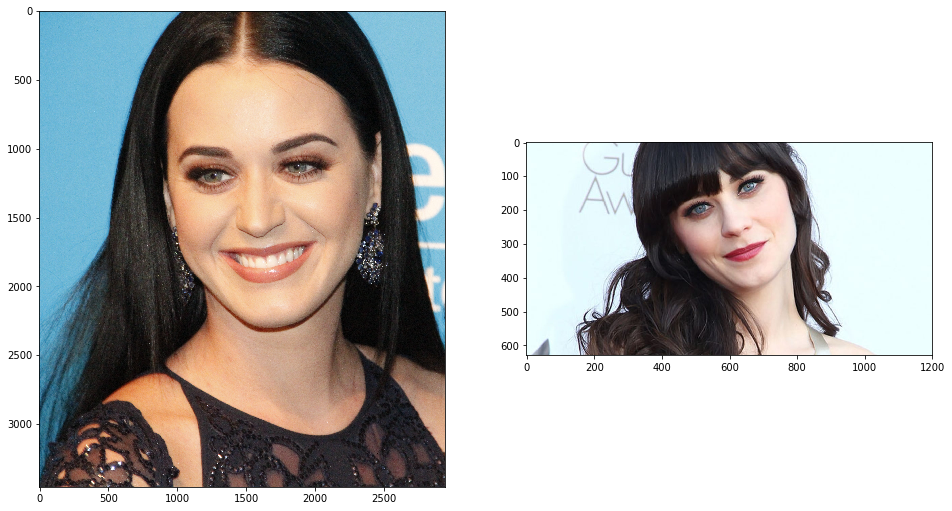

In [68]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 12)
axes[0].imshow(Katy)
axes[1].imshow(Zoey);
print(comparison(don1, Hillary))